<html>
<head></head>

<frameset border="0" frameborder="0" framespacing="0" rows="20%,*">
<frame src="title.html">
<frameset border="0" frameborder="0" framespacing="0" cols="30%,*">
<frame src="menu.html">
<frame src="content.html">
</frameset>
</frameset>
</html>



<div style="text-align: center">
   <img src="images/imgisi.PNG" width="200" />
</div>




 ### <B style="color:#00008B"> Réalisé par Sadok Mayssa</B>
   
 <hr>

## <p style="color:#e320c2" >Projet_clustering: </p>
<div style="text-align: center">
   <img src="images/tweet.PNG" width="500" />
</div>

## <a style="color:#611842" > Cadre de projet </a>

Durant le 3éme année cycle d’ingénieur  au sein de l’institut supérieur d’informatique et de télécommunication de hammem Sousse 
nous somme appelés à réaliser le projet intutilé "classification des tweets". 
le projet portera sur la classification selon plusieurs étapes . 

## <a style="color:#611842" > Objectifs </a>

Maitriser l’API de twitter pour l’extraction des tweets
• Maitriser la partie NLP (natural language processing) avec NLTK en Python
• Appliquer les principes de nettoyage des données
• Classer les tweets : regrouper ensemble les tweets qui sont similaires. C’est une étape qui peut
être considérée comme une étape 

## <a style="color:#611842" > Définition </a>

### <a style="color:#9400D3 " > 1. Twitter </a> 

Twitter est un réseau social populaire où les utilisateurs partagent des messages appelés tweets. Twitter nous permet d'exploiter les données de tout utilisateur en utilisant l'API Twitter ou Tweepy

### <a style="color:#9400D3 " > 2. cluster </a> 

Le clustering est une méthode d'analyse statistique utilisée pour organiser des données brutes en silos homogènes. 

A l'intérieur de chaque grappe, les données sont regroupées selon une caractéristique commune. 

L'outil d'ordonnancement est un algorithme qui mesure la proximité entre chaque élément à partir de critères définis.
Exemple de cluster : kameans 

## <a style="color:#4287f5" > I.  Installation des bibliothéques </a>

### 1. installation de tweepy

Tweepy prend en charge l'accès à Twitter via l'authentification de base et la nouvelle méthode, OAuth. Twitter a cessé d'accepter l'authentification de base, donc OAuth est désormais le seul moyen d'utiliser l'API Twitter.

In [ ]:
pip install tweepy

### 2. installation de SpaCy

SpaCy est une bibliothèque logicielle Python de traitement automatique des langues 
La bibliothèque SpaCy permet d'effectuer les opérations d'analyse suivantes3 sur des textes dans plus de 50 langues

In [ ]:
!pip install spacy

## <a style="color:#4287f5" > II. Importation des bibliothéques </a>

In [ ]:
import pandas as pd
import spacy
import en_core_web_sm
import tweepy 
import numpy as np
import datetime
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [ ]:
#consumer_key = "magd8QN2p2kW2RGFEtlcmBrSx" 
#consumer_secret = "6f50ean1ZvqUsSlAPnaTEwyddapaeEykwSRUvpljBFAnwnfKus"
#access_token= "1325576967173902337-emkCf6lBiizRb1kxSys1XPzLz9pdq4"
#access_token_secret = "rKlPNQ8twHEDUoUAA9uRmqWtqnPKYwwqNfDgeDS2Ozyqw"

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth)
#twitter_data_analysis = pd.DataFrame(columns = ['text'])
#tweets = tweepy.Cursor(api. user_timeline , id="twitter").items( 15000)

# Iterate and print tweets
#i=0
#for tweet in tweets:
    #twitter_data_analysis.loc[i,"text"] = tweet.text
    #i+=1


#import csv
#twitter_data_analysis.to_csv('twitter.csv',index = False)

###  1. Authentification et affichage de tweets 

À partir de compte tweeter develloper qu'ona  créer, ona enregistrer les informations suivantes dans un script appelé credentials.py:

Clé consommateur (clé API)
Secret consommateur (secret API)
Jeton d'accès
Access Token Secret


Les données seront des tweets extraits de l'utilisateur. La première chose à faire est d'obtenir la clé du consommateur, le secret du consommateur, la clé d'accès et le secret d'accès du développeur Twitter facilement disponibles pour chaque utilisateur.
Ces clés aideront l'API pour l'authentification.

In [ ]:
auth = tweepy.OAuthHandler('magd8QN2p2kW2RGFEtlcmBrSx', '6f50ean1ZvqUsSlAPnaTEwyddapaeEykwSRUvpljBFAnwnfKus')
auth.set_access_token('1325576967173902337-emkCf6lBiizRb1kxSys1XPzLz9pdq4', 'rKlPNQ8twHEDUoUAA9uRmqWtqnPKYwwqNfDgeDS2Ozyqw')

api = tweepy.API(auth, wait_on_rate_limit=True)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

###  2. Extraction de 1000 tweets et stokage de data 

In [ ]:
filename = 'Datasets/twitter'+(datetime.datetime.now().strftime("%Y-%m-%d-%H"))+'.csv'
with open (filename, 'w', newline='',encoding="utf-8") as csvFile:
    csvWriter = csv.writer(csvFile)
    csvWriter.writerow(['date', 'TweetId','Tweet','created_at','geo','place','coordinates','location'])
    #using tweepy Cursor
    for tweet in tweepy.Cursor(api.user_timeline , id="Twitter").items(11000):
        csvWriter.writerow([datetime.datetime.now().strftime("%Y-%m-%d  %H:%M"), tweet.id, tweet.text, tweet.created_at, tweet.geo, tweet.place.name if tweet.place else None, tweet.coordinates, tweet._json["user"]["location"]])

Dataset size: (3226, 8)
Columns are: Index(['date', 'TweetId', 'Tweet', 'created_at', 'geo', 'place', 'coordinates',
       'location'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3226 entries, 0 to 3225
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3226 non-null   object 
 1   TweetId      3226 non-null   int64  
 2   Tweet        3226 non-null   object 
 3   created_at   3226 non-null   object 
 4   geo          0 non-null      float64
 5   place        66 non-null     object 
 6   coordinates  0 non-null      float64
 7   location     3226 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 201.8+ KB


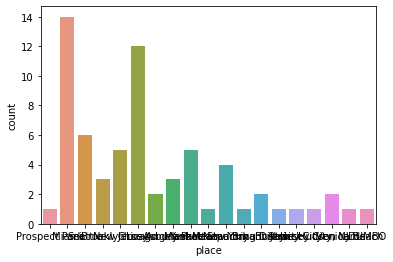

In [53]:

tweet_df= pd.read_csv('Datasets/twitter2020-12-15-12.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)
tweet_df.info()
sns.countplot(x = 'place', data = tweet_df)

####  <a style="color:#FF0000" > la méthode get_user (): </a>
La get_user()méthode de la classe API dans le module Tweepy est utilisée pour obtenir les informations de l'utilisateur spécifié.

In [ ]:
user = api.get_user('twitter')
print(user.screen_name)
print(user.followers_count)
for friend in user.friends():
    print(friend.screen_name)

## le netoiyage des données 
En Python3, string.punctuationest une chaîne pré-initialisée utilisée comme constante de chaîne. En Python, string.punctuationdonnera tous les ensembles de ponctuation.

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

on a  maintenant les informations initiales pour construire un pandas DataFrame, afin de manipuler les informations de manière très simple.



In [54]:
df  = pd.DataFrame(tweet_df[['TweetId', 'Tweet']])

In [55]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['Tweet'].apply(lambda x: remove_punct(x))
df.head(20)


,TweetId,Tweet,Tweet_punct
0,1338690093113077765,RT @angnickelodeon: twitter users with 150-350...,RT angnickelodeon twitter users with follower...
1,1338602685105377282,@yaryoush_ @BeshoyMaximus1 the way you both won 💙,yaryoush BeshoyMaximus the way you both won 💙
2,1337110460416536576,There’s more! We’ll also be testing sharing Tw...,There’s more We’ll also be testing sharing Twe...
3,1337095441968754690,Oh snap! 👻\n\nSharing Tweets directly to your ...,Oh snap 👻\n\nSharing Tweets directly to your S...
4,1336350876051582978,@levantinepali a stamp of approval https://t.c...,levantinepali a stamp of approval httpstcouQvb...
5,1334542969530183683,2020 in one word,in one word
6,1334540220642041862,@Astro_AJC this is what cuffing season means t...,AstroAJC this is what cuffing season means to us
7,1334540220591648770,@un3asyy 2 is also cute,unasyy is also cute
8,1333921747691769856,@DeePeeArts you're all amazing,DeePeeArts youre all amazing
9,1329561340596391936,RT @shesooosaddity: if you had a twitter befor...,RT shesooosaddity if you had a twitter before ...


 
####  <a style="color:#FF0000" > la fonction tokenization: </a>
Convertit les jetons en code source Python. L'iterable doit renvoyer des séquences avec au moins deux éléments, le type de jeton et la chaîne de caractères associée. Tout élément de séquence supplémentaire est ignoré

In [58]:
def tokenization(text):
    text = re.split(' ', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head(10)

,TweetId,Tweet,Tweet_punct,Tweet_tokenized
0,1338690093113077765,RT @angnickelodeon: twitter users with 150-350...,RT angnickelodeon twitter users with follower...,"[rt, angnickelodeon, twitter, users, with, , f..."
1,1338602685105377282,@yaryoush_ @BeshoyMaximus1 the way you both won 💙,yaryoush BeshoyMaximus the way you both won 💙,"[yaryoush, beshoymaximus, the, way, you, both,..."
2,1337110460416536576,There’s more! We’ll also be testing sharing Tw...,There’s more We’ll also be testing sharing Twe...,"[there’s, more, we’ll, also, be, testing, shar..."
3,1337095441968754690,Oh snap! 👻\n\nSharing Tweets directly to your ...,Oh snap 👻\n\nSharing Tweets directly to your S...,"[oh, snap, 👻\n\nsharing, tweets, directly, to,..."
4,1336350876051582978,@levantinepali a stamp of approval https://t.c...,levantinepali a stamp of approval httpstcouQvb...,"[levantinepali, a, stamp, of, approval, httpst..."
5,1334542969530183683,2020 in one word,in one word,"[, in, one, word]"
6,1334540220642041862,@Astro_AJC this is what cuffing season means t...,AstroAJC this is what cuffing season means to us,"[astroajc, this, is, what, cuffing, season, me..."
7,1334540220591648770,@un3asyy 2 is also cute,unasyy is also cute,"[unasyy, , is, also, cute]"
8,1333921747691769856,@DeePeeArts you're all amazing,DeePeeArts youre all amazing,"[deepeearts, youre, all, amazing]"
9,1329561340596391936,RT @shesooosaddity: if you had a twitter befor...,RT shesooosaddity if you had a twitter before ...,"[rt, shesooosaddity, if, you, had, a, twitter,..."


La première manipulation souvent effectuée dans le traitement du texte est la suppression de ce qu'on appelle en anglais
les stopwords. Ce sont les mots très courants dans la langue étudiée ("et", "à", "le"... en français) 
qui n'apportent pas de valeur informative pour la compréhension du "sens" d'un document et corpus. 
Il sont très fréquents et ralentissent notre travail : nous souhaitons donc les supprimer.



####  <a style="color:#FF0000" > la librairie NLTK </a>

Il existe dans la librairie NLTK une liste par défaut des stopwords dans plusieurs langues, notamment le français.
Mais nous allons faire ceci d'une autre manière : on va supprimer les mots les plus fréquents du corpus et considérer qu'il font partie du vocabulaire commun et n'apportent aucune information. Ensuite on supprimera aussi les stopwords fournis par NLTK.

In [60]:
stopword = nltk.corpus.stopwords.words('english')

In [61]:
stopword.extend(['old', 'new', 'age', 'lot', 'bag', 'top', 'cat', 'bat', 'sap', 'jda', 'tea', 'dog', 'lie', 'law', 'lab',\
             'mob', 'map', 'car', 'fat', 'sea', 'saw', 'raw', 'rob', 'win', 'can', 'get', 'fan', 'fun', 'big',\
             'use', 'pea', 'pit','pot', 'pat', 'ear', 'eye', 'kit', 'pot', 'pen', 'bud', 'bet', 'god', 'tax', 'won', 'run',\
              'lid', 'log', 'pr', 'pd', 'cop', 'nyc', 'ny', 'la', 'toy', 'war', 'law', 'lax', 'jfk', 'fed', 'cry', 'ceo',\
              'pay', 'pet', 'fan', 'fun', 'usd', 'rio',':)', ';)', '(:', '(;', '}', '{','}','here', 'there', 'where', 'when', 'would', 'should', 'could','thats', 'youre', 'thanks', 'hasn',\
             'thank', 'https', 'since', 'wanna', 'gonna', 'aint', 'http', 'unto', 'onto', 'into', 'havent',\
             'dont', 'done', 'cant', 'werent', 'https', 'u', 'isnt', 'go', 'theyre', 'each', 'every', 'shes', 'youve', 'youll',\
            'weve', 'theyve','googleele' , 'goog', 'lyin', 'lie', 'googles', 'goog', 'aapl','apple',\
             'msft','microsoft', 'google', 'goog', 'googl','goog','https'])

In [62]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,TweetId,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,1338690093113077765,RT @angnickelodeon: twitter users with 150-350...,RT angnickelodeon twitter users with follower...,"[rt, angnickelodeon, twitter, users, with, , f...","[rt, angnickelodeon, twitter, users, , followe..."
1,1338602685105377282,@yaryoush_ @BeshoyMaximus1 the way you both won 💙,yaryoush BeshoyMaximus the way you both won 💙,"[yaryoush, beshoymaximus, the, way, you, both,...","[yaryoush, beshoymaximus, way, 💙]"
2,1337110460416536576,There’s more! We’ll also be testing sharing Tw...,There’s more We’ll also be testing sharing Twe...,"[there’s, more, we’ll, also, be, testing, shar...","[there’s, we’ll, also, testing, sharing, tweet..."
3,1337095441968754690,Oh snap! 👻\n\nSharing Tweets directly to your ...,Oh snap 👻\n\nSharing Tweets directly to your S...,"[oh, snap, 👻\n\nsharing, tweets, directly, to,...","[oh, snap, 👻\n\nsharing, tweets, directly, sna..."
4,1336350876051582978,@levantinepali a stamp of approval https://t.c...,levantinepali a stamp of approval httpstcouQvb...,"[levantinepali, a, stamp, of, approval, httpst...","[levantinepali, stamp, approval, httpstcouqvbs..."
5,1334542969530183683,2020 in one word,in one word,"[, in, one, word]","[, one, word]"
6,1334540220642041862,@Astro_AJC this is what cuffing season means t...,AstroAJC this is what cuffing season means to us,"[astroajc, this, is, what, cuffing, season, me...","[astroajc, cuffing, season, means, us]"
7,1334540220591648770,@un3asyy 2 is also cute,unasyy is also cute,"[unasyy, , is, also, cute]","[unasyy, , also, cute]"
8,1333921747691769856,@DeePeeArts you're all amazing,DeePeeArts youre all amazing,"[deepeearts, youre, all, amazing]","[deepeearts, amazing]"
9,1329561340596391936,RT @shesooosaddity: if you had a twitter befor...,RT shesooosaddity if you had a twitter before ...,"[rt, shesooosaddity, if, you, had, a, twitter,...","[rt, shesooosaddity, twitter, , rt]"


In [63]:
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,TweetId,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,1338690093113077765,RT @angnickelodeon: twitter users with 150-350...,RT angnickelodeon twitter users with follower...,"[rt, angnickelodeon, twitter, users, with, , f...","[rt, angnickelodeon, twitter, users, , followe...","[rt, angnickelodeon, twitter, user, , follow, ..."
1,1338602685105377282,@yaryoush_ @BeshoyMaximus1 the way you both won 💙,yaryoush BeshoyMaximus the way you both won 💙,"[yaryoush, beshoymaximus, the, way, you, both,...","[yaryoush, beshoymaximus, way, 💙]","[yaryoush, beshoymaximu, way, 💙]"
2,1337110460416536576,There’s more! We’ll also be testing sharing Tw...,There’s more We’ll also be testing sharing Twe...,"[there’s, more, we’ll, also, be, testing, shar...","[there’s, we’ll, also, testing, sharing, tweet...","[there’, we’ll, also, test, share, tweet, ig, ..."
3,1337095441968754690,Oh snap! 👻\n\nSharing Tweets directly to your ...,Oh snap 👻\n\nSharing Tweets directly to your S...,"[oh, snap, 👻\n\nsharing, tweets, directly, to,...","[oh, snap, 👻\n\nsharing, tweets, directly, sna...","[oh, snap, 👻\n\nshare, tweet, directli, snapch..."
4,1336350876051582978,@levantinepali a stamp of approval https://t.c...,levantinepali a stamp of approval httpstcouQvb...,"[levantinepali, a, stamp, of, approval, httpst...","[levantinepali, stamp, approval, httpstcouqvbs...","[levantinepali, stamp, approv, httpstcouqvbsxjcw]"


In [64]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

,TweetId,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,1338690093113077765,RT @angnickelodeon: twitter users with 150-350...,RT angnickelodeon twitter users with follower...,"[rt, angnickelodeon, twitter, users, with, , f...","[rt, angnickelodeon, twitter, users, , followe...","[rt, angnickelodeon, twitter, user, , follow, ...","[rt, angnickelodeon, twitter, user, , follower..."
1,1338602685105377282,@yaryoush_ @BeshoyMaximus1 the way you both won 💙,yaryoush BeshoyMaximus the way you both won 💙,"[yaryoush, beshoymaximus, the, way, you, both,...","[yaryoush, beshoymaximus, way, 💙]","[yaryoush, beshoymaximu, way, 💙]","[yaryoush, beshoymaximus, way, 💙]"
2,1337110460416536576,There’s more! We’ll also be testing sharing Tw...,There’s more We’ll also be testing sharing Twe...,"[there’s, more, we’ll, also, be, testing, shar...","[there’s, we’ll, also, testing, sharing, tweet...","[there’, we’ll, also, test, share, tweet, ig, ...","[there’s, we’ll, also, testing, sharing, tweet..."
3,1337095441968754690,Oh snap! 👻\n\nSharing Tweets directly to your ...,Oh snap 👻\n\nSharing Tweets directly to your S...,"[oh, snap, 👻\n\nsharing, tweets, directly, to,...","[oh, snap, 👻\n\nsharing, tweets, directly, sna...","[oh, snap, 👻\n\nshare, tweet, directli, snapch...","[oh, snap, 👻\n\nsharing, tweet, directly, snap..."
4,1336350876051582978,@levantinepali a stamp of approval https://t.c...,levantinepali a stamp of approval httpstcouQvb...,"[levantinepali, a, stamp, of, approval, httpst...","[levantinepali, stamp, approval, httpstcouqvbs...","[levantinepali, stamp, approv, httpstcouqvbsxjcw]","[levantinepali, stamp, approval, httpstcouqvbs..."


In [65]:

df.Tweet_lemmatized

0       [rt, angnickelodeon, twitter, user, , follower...
1                       [yaryoush, beshoymaximus, way, 💙]
2       [there’s, we’ll, also, testing, sharing, tweet...
3       [oh, snap, 👻\n\nsharing, tweet, directly, snap...
4       [levantinepali, stamp, approval, httpstcouqvbs...
                              ...                        
3221       [themegaboi, keeping, brain, thinking, around]
3222    [guillaumetc, hamillhimself, chrisevans, combo...
3223                          [ksjize, hi, dogrates, got]
3224               [insomniacookies, cc, mecookiemonster]
3225    [mnoir, amp, guaranteed, good, morning, good, ...
Name: Tweet_lemmatized, Length: 3226, dtype: object

In [66]:
df.Tweet_lemmatized.to_csv('Datasets/new_tweets_clean.csv',index = False)

In [67]:
# remove the hashtags, mentions and unwanted characters.
new_tweet_df= pd.read_csv('Datasets/new_tweets_clean.csv')
print('Dataset size:',new_tweet_df.shape)
print('Columns are:',new_tweet_df.columns)
new_tweet_df.info()
new_tweet_df.head()

Dataset size: (3226, 1)
Columns are: Index(['Tweet_lemmatized'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3226 entries, 0 to 3225
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tweet_lemmatized  3226 non-null   object
dtypes: object(1)
memory usage: 25.3+ KB


,Tweet_lemmatized
0,"['rt', 'angnickelodeon', 'twitter', 'user', ''..."
1,"['yaryoush', 'beshoymaximus', 'way', '💙']"
2,"['there’s', 'we’ll', 'also', 'testing', 'shari..."
3,"['oh', 'snap', '👻\n\nsharing', 'tweet', 'direc..."
4,"['levantinepali', 'stamp', 'approval', 'httpst..."


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(new_tweet_df.Tweet_lemmatized)
print(X)

  (0, 4708)	1
  (0, 212)	1
  (0, 5766)	1
  (0, 5853)	1
  (0, 1766)	1
  (0, 393)	1
  (0, 5086)	1
  (1, 6136)	1
  (1, 501)	1
  (1, 5981)	1
  (2, 5511)	1
  (2, 5985)	1
  (2, 3349)	1
  (2, 165)	1
  (2, 5438)	1
  (2, 4912)	1
  (2, 5752)	1
  (2, 2683)	1
  (2, 5241)	1
  (2, 5058)	1
  (2, 3085)	1
  (3, 5752)	1
  (3, 5241)	1
  (3, 4110)	1
  (3, 5074)	1
  :	:
  (3221, 287)	1
  (3221, 3086)	1
  (3221, 5498)	1
  (3222, 6002)	1
  (3222, 5778)	1
  (3222, 6026)	1
  (3222, 148)	1
  (3222, 2002)	1
  (3222, 2026)	1
  (3222, 880)	1
  (3222, 978)	1
  (3223, 1940)	1
  (3223, 2128)	1
  (3223, 1341)	1
  (3223, 3170)	1
  (3224, 3565)	1
  (3224, 793)	1
  (3224, 2756)	1
  (3225, 5752)	1
  (3225, 1928)	2
  (3225, 3729)	1
  (3225, 3963)	1
  (3225, 189)	1
  (3225, 3690)	1
  (3225, 1996)	1


In [69]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(3,30):
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

Initialization complete
Iteration 0, inertia 19711.0
Iteration 1, inertia 13145.32715332851
Iteration 2, inertia 13046.192597879299
Converged at iteration 2: center shift 0.0 within tolerance 6.585316032108977e-08
Initialization complete
Iteration 0, inertia 22739.0
Iteration 1, inertia 13026.018434541726
Iteration 2, inertia 12976.610207572456
Iteration 3, inertia 12958.284920866594
Iteration 4, inertia 12957.974979007202
Converged at iteration 4: center shift 0.0 within tolerance 6.585316032108977e-08
Initialization complete
Iteration 0, inertia 19500.0
Iteration 1, inertia 12855.682187438255
Iteration 2, inertia 12855.32586959115
Converged at iteration 2: center shift 0.0 within tolerance 6.585316032108977e-08
Initialization complete
Iteration 0, inertia 19665.0
Iteration 1, inertia 13126.852146229165
Iteration 2, inertia 13125.192285302055
Iteration 3, inertia 13123.532751997816
Iteration 4, inertia 13116.806530431237
Iteration 5, inertia 13116.100490127557
Iteration 6, inertia 130

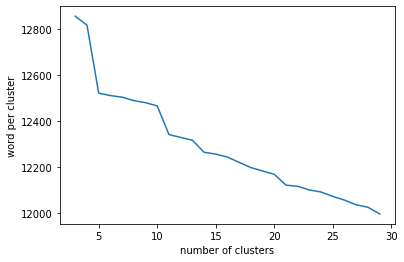

In [71]:

import matplotlib.pyplot as plt
plt.plot(range(3,30),wcss)
plt.xlabel('number of clusters')
plt.ylabel('word per cluster')
plt.show()

In [72]:
true_k=30
Kmeans=KMeans(n_clusters=true_k,init='k-means++',n_init=1)
Kmeans.fit(X)

KMeans(n_clusters=30, n_init=1)

In [74]:
print("Top terms per cluster:")
order_centroids = Kmeans.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    print("************************************************")
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()
print("\n")

Top terms per cluster:
Cluster 0:
************************************************
 check
 dm
 tada
 marialfl
 httpstcovazbebunuf
 detail
 httpstcocicmfdkoe
 httpstcodvnordx
 francesf
 httpstcogedroeewf

Cluster 1:
************************************************
 one
 tweet
 like
 dog
 real
 thought
 another
 lead
 day
 twitter

Cluster 2:
************************************************
 also
 we
 twitter
 tweet
 correct
 history
 color
 whole
 story
 month

Cluster 3:
************************************************
 stay
 tweet
 tuned
 together
 meme
 valaafshar
 away
 gone
 notevenepic
 twitter

Cluster 4:
************************************************
 th
 company
 rt
 twitter
 making
 jack
 forevermore
 holiday
 juneteenth
 june

Cluster 5:
************************************************
 bryanyang
 momentarily
 due
 held
 viral
 gentleman
 tweet
 lady
 hard
 harder

Cluster 6:
************************************************
 decade
 hmberto
 tweet
 hydrated
 classic
 energy

In [75]:
i=0
j=0
while i<28:
    while True: 
        Y=cv.transform([new_tweet_df.Tweet_lemmatized[j]])
        prediction=Kmeans.predict(Y)
        if i == prediction:
            print("Tweet of cluster "+str(prediction)+" : "+df.Tweet[i])
            print ("-----------------------------------------------")
            print("\n")
            j=0
            break
        j+=1
    i+=1

Tweet of cluster [0] : RT @angnickelodeon: twitter users with 150-350 followers are the backbone of society
-----------------------------------------------


Tweet of cluster [1] : @yaryoush_ @BeshoyMaximus1 the way you both won 💙
-----------------------------------------------


Tweet of cluster [2] : There’s more! We’ll also be testing sharing Tweets to IG Stories to a small % so keep an eye out
-----------------------------------------------


Tweet of cluster [3] : Oh snap! 👻

Sharing Tweets directly to your Snapchat Stories is now easier than ever. Rolling out today on iOS! https://t.co/0LIHQhmCKu
-----------------------------------------------


Tweet of cluster [4] : @levantinepali a stamp of approval https://t.co/uQvb8sxjCw
-----------------------------------------------


Tweet of cluster [5] : 2020 in one word
-----------------------------------------------


Tweet of cluster [6] : @Astro_AJC this is what cuffing season means to us
--------------------------------------------

In [80]:
economy_related_words = "agriculture infrastructure capitalism trading service sector technology  economical supply industrialism efficiency frugality retrenchment downsizing   credit debit value economize   save  economically economies sluggish rise   rising spending conserve trend low-management  decline   industry impact poor  profession    surplus   fall declining  accelerating interest sectors balance stability productivity increase rates pushing expanding stabilize  rate industrial borrowing strugglingdeficit predicted    increasing  data economizer analysts investment market-based economy   debt free enterprise medium  exchange metric savepoint scarcity capital bank company stockholder fund business  asset treasury tourism incomes contraction employment jobs upturn deflation  macroeconomics bankruptcies exporters hyperinflation dollar entrepreneurship upswing marketplace commerce devaluation quicksave deindustrialization stockmarket reflation downspin dollarization withholder bankroll venture capital mutual fund plan economy mortgage lender unemployment rate credit crunch central bank financial institution bank rate custom duties mass-production black-market developing-countries developing economic-growth gdp trade barter distribution downturn economist"
social_related_words = " emotion excuse shield creative persistence  enthusiastic self disciplined self-disciplined optimistic proactive courageous spiritual  positve attitude	monitor moods monitor behavior motivated school smar people smart  negative influences peer pressure personal best	achievement reading math belief systems  resilience"
culture_related_words = "arts humanities philosophy literature music painting beliefs ethos intellectual achievement intellectual achievements principles intellectual activity visual art fine art art, music, and literature lifestyle customs traditions habit background civilisationUK civilizationUS habits heritage mores society values ways life convention development ethnicity ethnology folklore folkways grounding humanism ideas knowledge arts and sciences the arts way of life community nation race tradition people origin ancestry ethnic group principles beliefs philosophy ethos lineage state population extraction pedigree clan tribe way of living nationality identity descent style of living parentage colorUS cultural group colourUK attainments achievements polity social order world the world the social order heredity roots racial type strain ethnic origin human activity mankind humanity humankind ethnic background rubric prescription rule custom past history ethnos situation condition naturalisationUK allegiance political home confederation body politic country affiliation residence native land enfranchisement ethnic minority naturalizationUS national status behaviourUK position regime conduct group routine behaviorUS populace fate lot existence station citizenry being doctrine essence circumstances circumstance manner of living activities personage business living kind kin progeny environment state of play daily life way of acting mode of living everyday life type region land realm standard of living set of circumstances empire commonwealth republic federation sovereignty organizationUS institution citizens political entity public union kingdom organisationUK fatherland motherland sovranty homeland residents inhabitants democracy territory power superpower domain micronation nation state sovereign state dominion principality monarchy nation-state res publica commonality general public collective klatch fold natives klatsch denizens burghers"
health_related_words =  "asthma band aid bandage be allergic to be constipated be exhausted be tired  blood blow one’s nose catch a cold chickenpox cough  crutch doctor faint family doctor feel dizzy feel good  feel sick flu get a bruiseget burnt have a cold have a cough have a headache have a rash have a sore throat have a stomach ache have a temperature have backache have constipationhave diarrhoea  have earache have spots have toothache heart attack heart disease hepatitis hospital hurt injection injury medicine mumps nurse painful painless pass out pill plaster prescription small pox sneeze suffer from swell take a medicine take an aspirin  throw up twist one’s ankle ulcer vaccine vomit wheelchair ound"

In [81]:
nlp = en_core_web_sm.load() 
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(nltk.corpus.stopwords.words('english'))
punctuation = list(string.punctuation) 
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
        if i.lower() not in stop:
            word1 = lemmatizer.lemmatize(i) 
            final_text.append(word1.lower())
    return " ".join(final_text)
df.Tweet = df.Tweet.apply(furnished)

In [82]:
economy = furnished(economy_related_words)
social = furnished(social_related_words)
culture = furnished(culture_related_words)
health = furnished(health_related_words)

In [83]:
string1 = economy
words = string1.split()
economy = " ".join(sorted(set(words), key=words.index))
economy
string1 = social
words = string1.split()
social = " ".join(sorted(set(words), key=words.index))
social
string1 = health
words = string1.split()
health = " ".join(sorted(set(words), key=words.index))
health
string1 = culture
words = string1.split()
culture = " ".join(sorted(set(words), key=words.index))
culture

'art humanity philosophy literature music painting belief ethos intellectual achievement principle activity visual fine art, music, lifestyle custom tradition habit background civilisationuk civilizationus heritage more society value way life convention development ethnicity ethnology folklore folkways grounding humanism idea knowledge science community nation race people origin ancestry ethnic group lineage state population extraction pedigree clan tribe living nationality identity descent style parentage colorus cultural colouruk attainment polity social order world heredity root racial type strain human mankind humankind rubric prescription rule past history ethnos situation condition naturalisationuk allegiance political home confederation body politic country affiliation residence native land enfranchisement minority naturalizationus national status behaviouruk position regime conduct routine behaviorus populace fate lot existence station citizenry doctrine essence circumstance ma

In [84]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores
e_scores = get_scores(economy, df.Tweet.to_list())
s_scores = get_scores(social, df.Tweet.to_list())
c_scores = get_scores(culture, df.Tweet.to_list())
h_scores = get_scores(health, df.Tweet.to_list())

In [85]:
# create a jaccard scored df.
data  = {'names':df.TweetId.to_list(),       'economic_score':e_scores,
         'social_score': s_scores, 'culture_score':c_scores, 'health_scores':h_scores}
scores_df = pd.DataFrame(data)
#assign classes based on highest score
def get_classes(l1, l2, l3, l4):
    econ = []
    socio = []
    cul = []
    heal = []
    for i, j, k, l in zip(l1, l2, l3, l4):
        m = max(i, j, k, l)
        if m == i:
            econ.append(1)
        else:
            econ.append(0)
        if m == j:
            socio.append(1)
        else:
            socio.append(0)        
        if m == k:
            cul.append(1)
        else:
            cul.append(0)  
        if m == l:
            heal.append(1)
        else:
            heal.append(0)   
            
    return econ, socio, cul, heal
l1 = scores_df.economic_score.to_list()
l2 = scores_df.social_score.to_list()
l3 = scores_df.culture_score.to_list()
l4 = scores_df.health_scores.to_list()
econ, socio, cul, heal = get_classes(l1, l2, l3, l4)
data = {'name': scores_df.names.to_list(), 'economic':econ, 'social':socio, 'culture':cul, 'health': heal}
class_df = pd.DataFrame(data)
#grouping the tweets by username
new_groups_df = class_df.groupby(['name']).sum()
#add a new totals column
new_groups_df['total'] = new_groups_df['health'] + new_groups_df['culture'] + new_groups_df['social'] +  new_groups_df['economic']
#add a new totals row
new_groups_df.loc["Total"] = new_groups_df.sum()

In [86]:

scores_df

,names,economic_score,social_score,culture_score,health_scores
0,1338690093113077765,0.588235,0.580645,0.606061,0.558824
1,1338602685105377282,0.437500,0.464286,0.451613,0.451613
2,1337110460416536576,0.566667,0.555556,0.586207,0.642857
3,1337095441968754690,0.647059,0.593750,0.617647,0.617647
4,1336350876051582978,0.636364,0.580645,0.558824,0.606061
...,...,...,...,...,...
3221,1147225147230904321,0.500000,0.535714,0.516129,0.516129
3222,1147223872326029314,0.612903,0.666667,0.689655,0.633333
3223,1147222590580305921,0.533333,0.464286,0.500000,0.551724
3224,1147222445381865472,0.400000,0.423077,0.413793,0.413793


In [87]:
new_groups_df

,economic,social,culture,health,total
name,,,,,
1147221416779157504,0,1,0,0,1
1147222445381865472,0,1,0,0,1
1147222590580305921,0,0,0,1,1
1147223872326029314,0,0,1,0,1
1147225147230904321,0,1,0,0,1
...,...,...,...,...,...
1337095441968754690,1,0,0,0,1
1337110460416536576,0,0,0,1,1
1338602685105377282,0,1,0,0,1


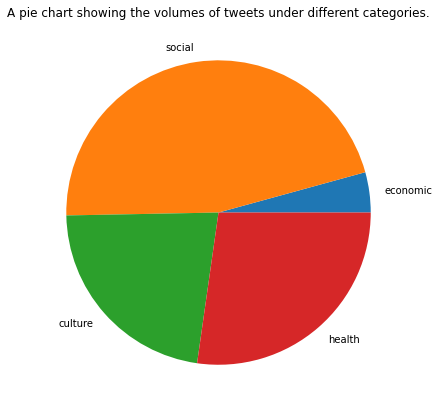

In [88]:
fig = plt.figure(figsize =(10, 7)) 
a = new_groups_df.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('A pie chart showing the volumes of tweets under different categories.')
plt.show()